# Comparing performance of different Nose-hoover thermostat parameters in my MNDO S0 sampling runs.

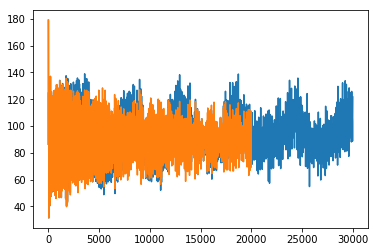

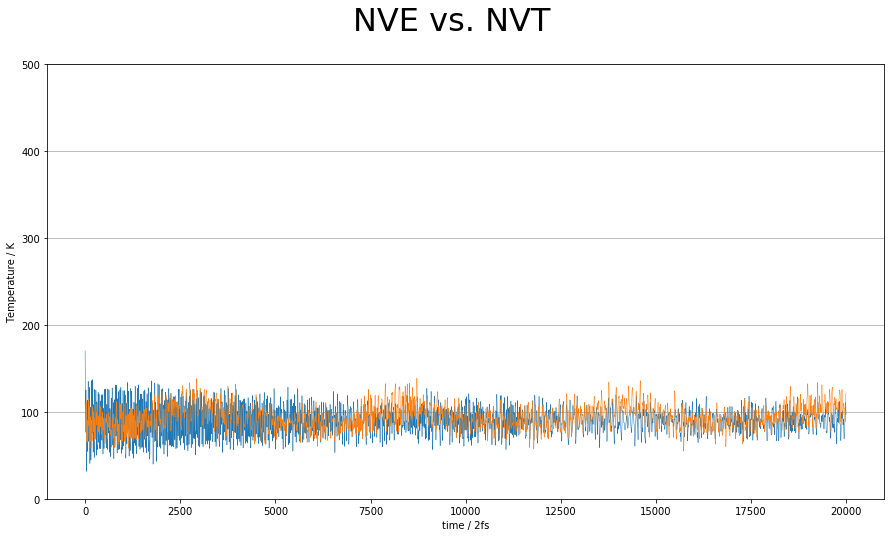

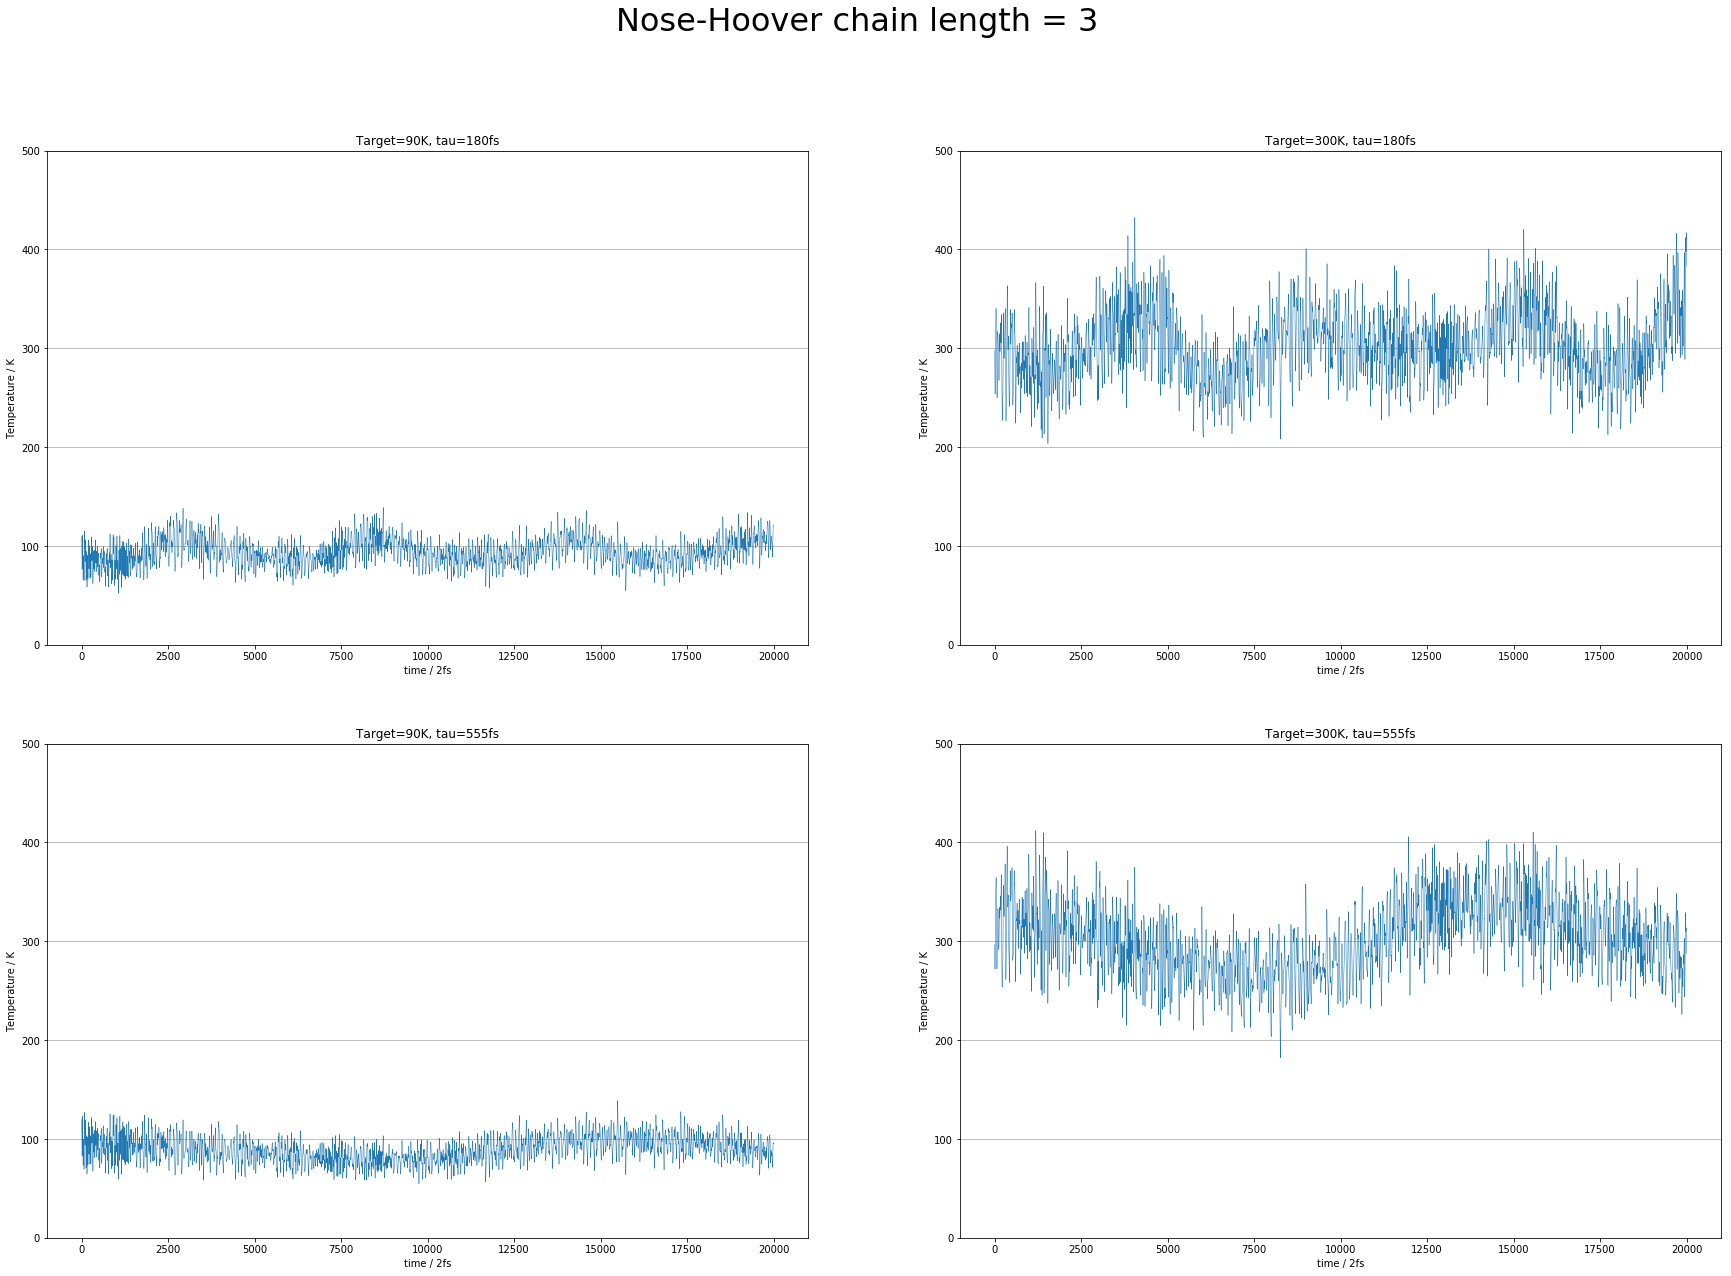

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

length = 19998 # Better an even number, makes Fourier part clearer.

n1 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/56tnvtsamp1.dat", skip_header=1, skip_footer=0)
plt.plot(n1)
n1 = n1[-length:]
n2 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/56tnvtsamp2.dat", skip_header=1, skip_footer=0)
n2 = n2[-length:]
n3 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/56tnvtsamp3.dat", skip_header=1, skip_footer=0)
n3 = n3[-length:]
n4 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/56tnvtsamp4.dat", skip_header=1, skip_footer=0)
n4 = n4[-length:]

e1 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/56tnvesamp1.dat", skip_header=1, skip_footer=0)
plt.plot(e1)
e1 = e1[-length:]
e2 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/56tnvesamp2.dat", skip_header=1, skip_footer=0)
e2 = e2[-length:]
e3 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/56tnvesamp3.dat", skip_header=1, skip_footer=0)
e3 = e3[-length:]
e4 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/56tnvesamp4.dat", skip_header=1, skip_footer=0)
e4 = e4[-length:]

def temp_series(ax, data):
    out = ax.plot(data,linewidth=0.5)
    ax.set_ylim(0,500)
    ax.set_xlabel('time / 2fs')
    ax.set_ylabel('Temperature / K')
    ax.grid(True,axis='y')
    return out

fig0, ax = plt.subplots(figsize=(15,8))
fig0.suptitle('NVE vs. NVT',fontsize=32)
temp_series(ax, e1)
temp_series(ax, n1)

fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(30,20))
fig1.suptitle('Nose-Hoover chain length = 3',fontsize=32)

ax1.set_title("Target=90K, tau=180fs")
temp_series(ax1, n1)

ax2.set_title("Target=300K, tau=180fs")
temp_series(ax2, n2)

ax3.set_title("Target=90K, tau=555fs")
temp_series(ax3, n3)

ax4.set_title("Target=300K, tau=555fs")
temp_series(ax4, n4)

# Trying Fourier transform on the time series:
First, a test case on artificial sine data.

the mean is: 5.041788461583639
the mean is: 5.041788461583639
the mean is: 5.041788461583639
the mean is: 5.041788461583639


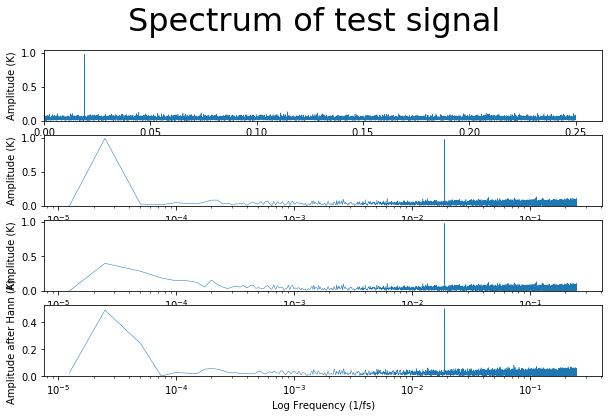

In [3]:
from scipy import fftpack
from scipy import signal

def spectrum(ax, x):
    print ("the mean is:", np.mean(x))
    X = fftpack.fft(x-np.mean(x)) # removing zeroth frequency 
    N = int(len(X)/2) # only retaining real positive frequency
    freqs = fftpack.fftfreq(len(x),d=timestep)
    out = ax.plot(freqs[:N], 1/N*np.abs(X[:N]), linewidth=0.5)
    ax.set_xlabel('Frequency (1/fs)')
    ax.set_ylabel('Amplitude (K)')
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    return out

def spectrum_log(ax, x):
    print ("the mean is:", np.mean(x))
    X = fftpack.fft(x-np.mean(x))
    N = int(len(X)/2) # only retaining real positive frequency
    freqs = fftpack.fftfreq(len(x),d=timestep)
    ax.set_xscale('log')
    freqs4log = freqs[:N]
    freqs4log[0] = freqs[1]*0.5 # A trick to show y(x=0) in a semilog plot as the smallest freq. 
    out = ax.plot(freqs4log, 1/N*np.abs(X[:N]), linewidth=0.5)
    ax.set_xlabel('Log Frequency (1/fs)')
    ax.set_ylabel('Amplitude (K)')
    ax.set_ylim(bottom=0)
    return out

# Probably need to add code to average over slices
def spectrum_hannlog(ax, x):
    print ("the mean is:", np.mean(x))
    hann = np.hanning(len(x))
    X = fftpack.fft((x-np.mean(x))*hann)
    N = int(len(X)/2) # only retaining real positive frequency
    freqs = fftpack.fftfreq(len(x),d=timestep)
    ax.set_xscale('log')
    freqs4log = freqs[:N]
    freqs4log[0] = freqs[1]*0.5 # A trick to show y(x=0) in a semilog plot as the smallest freq. 
    out = ax.plot(freqs4log, 1/N*np.abs(X[:N]), linewidth=0.5)
    ax.set_xlabel('Log Frequency (1/fs)')
    ax.set_ylabel('Amplitude after Hann (K)')
    ax.set_ylim(bottom=0)
    return out

def spectrum_detrendlog(ax, x):
    print ("the mean is:", np.mean(x))
    X = fftpack.fft(signal.detrend(x)) #sometimes detrend is equivalent to subtracting mean, because the fit is linear.
    N = int(len(X)/2) # only retaining real positive frequency
    freqs = fftpack.fftfreq(len(x),d=timestep)
    ax.set_xscale('log')
    freqs4log = freqs[:N]
    freqs4log[0] = freqs[1]*0.5 # A trick to show y(x=0) in a semilog plot as the smallest freq. 
    out = ax.plot(freqs4log, 1/N*np.abs(X[:N]), linewidth=0.5)
    ax.set_xlabel('Log Frequency (1/fs)')
    ax.set_ylabel('Amplitude (K)')
    ax.set_ylim(bottom=0)
    return out

timestep = 2 # MD time step in fs.
f_s = 1/timestep # sampling frequency in fs^-1
time = np.linspace(0,length*timestep,length)
testsig = np.sin(2*np.pi*0.019*time)+10*np.random.rand(len(time)) + np.sin(2*np.pi*0.000025*time) # So the fluctuation has freq. of 0.019 fs^-1

fig3, (axno, axlog, axdetrend, axhannlog) = plt.subplots(4,1,figsize=(10,6))
fig3.suptitle('Spectrum of test signal',fontsize=32)

spectrum(axno, testsig)
spectrum_log(axlog, testsig)
spectrum_detrendlog(axdetrend, testsig)
spectrum_hannlog(axhannlog, testsig)

# Test case is good, with X and Y axis in correct physical scale, now test on real data.

the mean is: 94.18827059222922
the mean is: 94.18827059222922
the mean is: 94.18827059222922
the mean is: 94.18827059222922


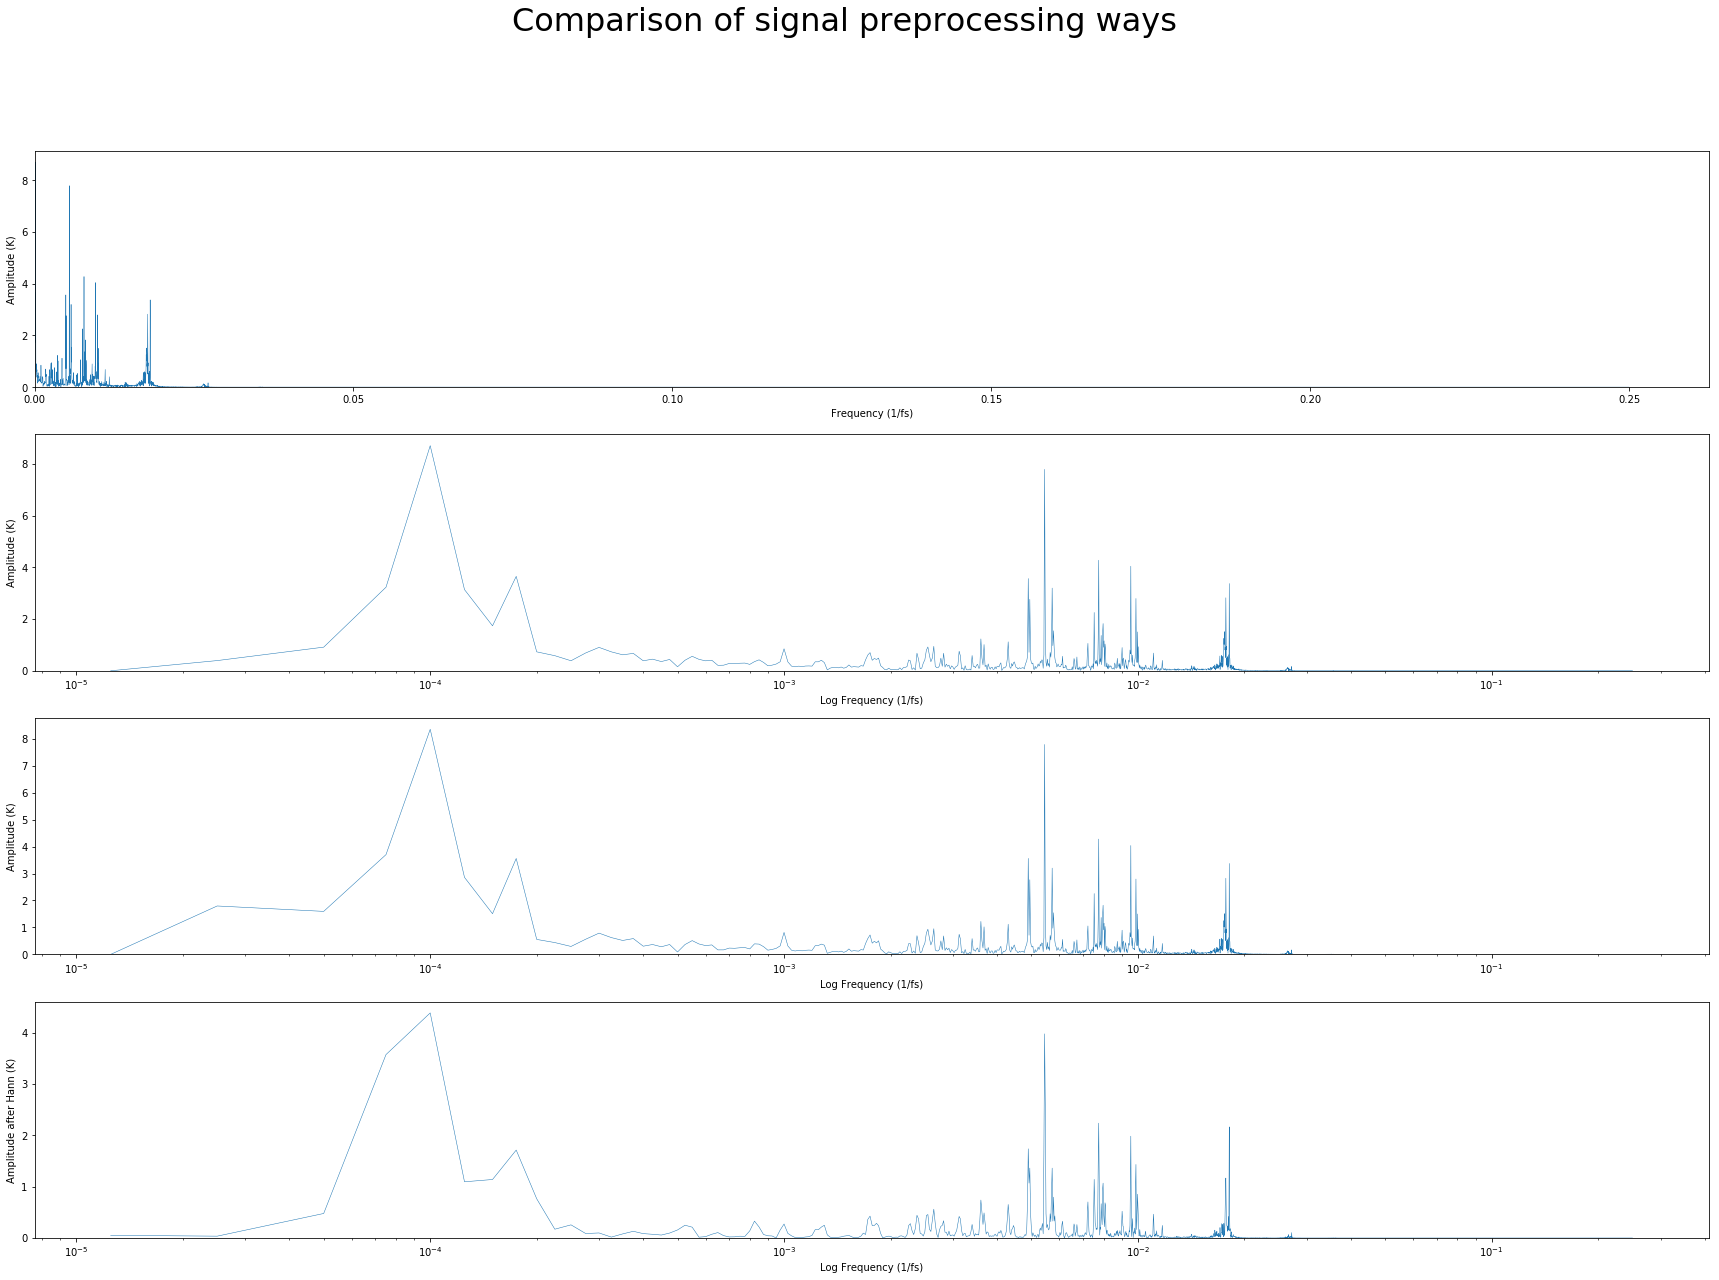

In [4]:
fig4, (axno, axlog, axdetrend, axhannlog) = plt.subplots(4,1,figsize=(30,20))
fig4.suptitle('Comparison of signal preprocessing ways',fontsize=32)

spectrum(axno, n1)
spectrum_log(axlog, n1)
spectrum_detrendlog(axdetrend, n1)
spectrum_hannlog(axhannlog, n1)

# Not quite sensitive to how I preprocess... 
# Now plot for different thermostat settings using detrended log spectra.

the mean is: 94.18827059222922
the mean is: 94.18827059222919
the mean is: 302.43766235523054
the mean is: 94.1882705922292
the mean is: 89.69292693545356
the mean is: 94.18827059222919
the mean is: 301.94115872829786
the mean is: 94.1882705922292


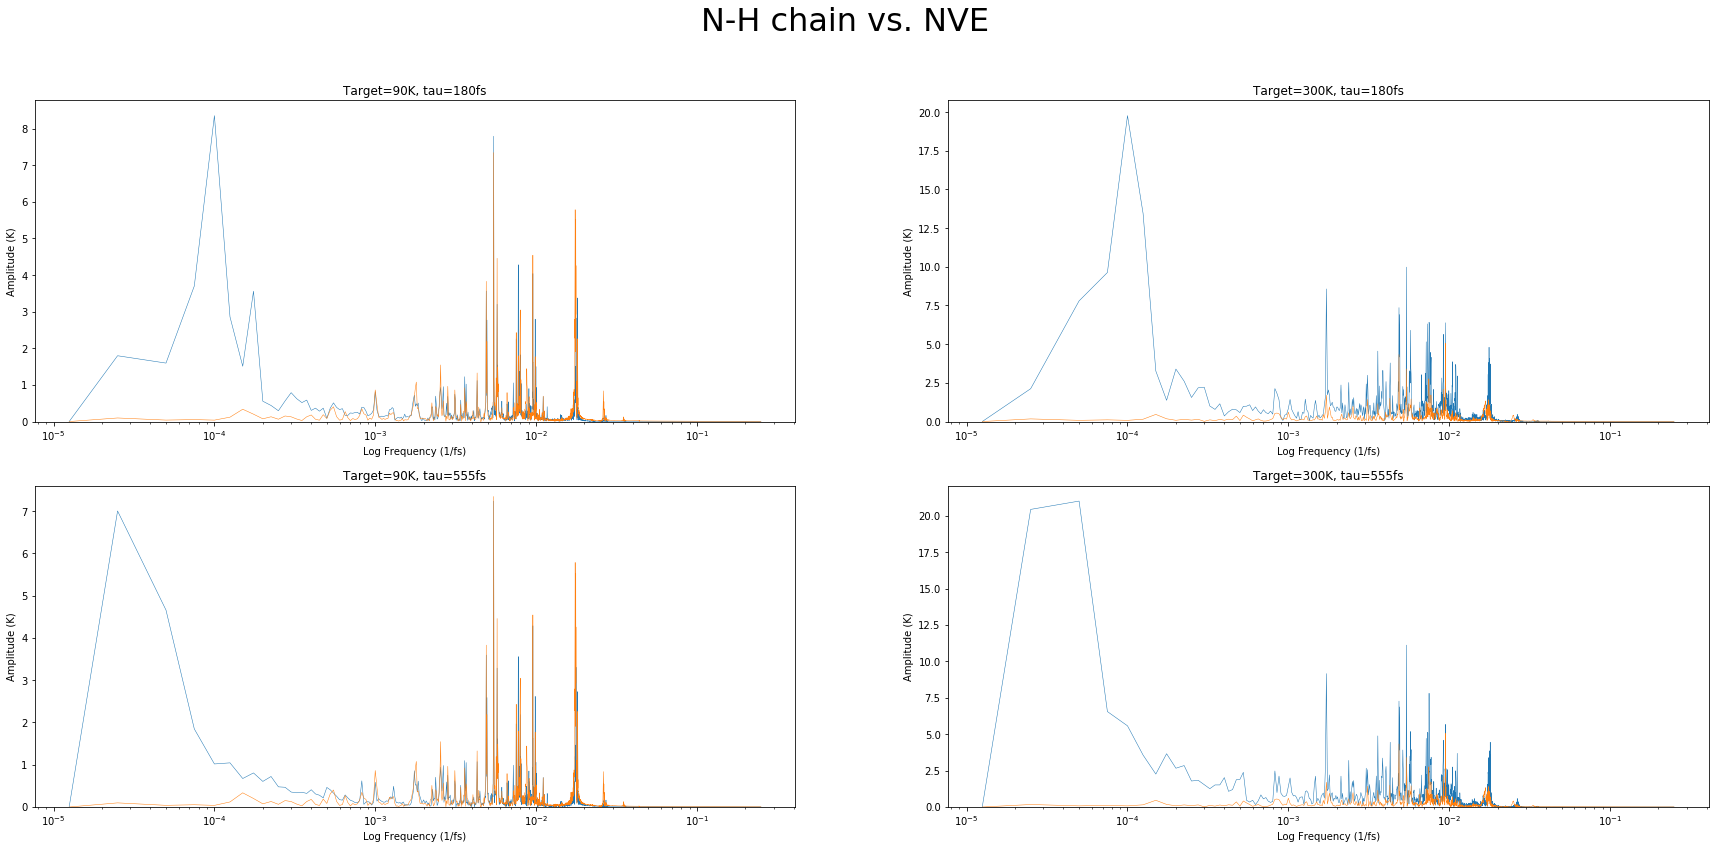

In [6]:
fig5, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(30,13))
fig5.suptitle('N-H chain vs. NVE',fontsize=32)

ax1.set_title("Target=90K, tau=180fs")
spectrum_detrendlog(ax1, n1)
spectrum_detrendlog(ax1, e1 * np.mean(n1)/np.mean(e1))   # to account for that T_fluctuation~T

ax2.set_title("Target=300K, tau=180fs")
spectrum_detrendlog(ax2, n2)
spectrum_detrendlog(ax2, e2 * np.mean(n1)/np.mean(e2))   # to account for that T_fluctuation~T

ax3.set_title("Target=90K, tau=555fs")
spectrum_detrendlog(ax3, n3)
spectrum_detrendlog(ax3, e3 * np.mean(n1)/np.mean(e3))   # to account for that T_fluctuation~T

ax4.set_title("Target=300K, tau=555fs")
spectrum_detrendlog(ax4, n4)
spectrum_detrendlog(ax4, e4 * np.mean(n1)/np.mean(e4))   # to account for that T_fluctuation~T

# Printing and ploting the peak frequecies:

[0.00177518 0.00360036 0.00880088 0.00872587 0.00282528 0.009951
 0.00877588 0.00582558 0.01775178 0.01772677 0.00180018 0.01782678
 0.00805081 0.00547555 0.00565057 0.01732673 0.00962596 0.01815182
 0.00430043 0.00875088 0.00577558 0.00255026 0.00957596 0.00960096
 0.00987599 0.00775078 0.01760176 0.01735174 0.0049505  0.01812681
 0.01740174 0.01762676 0.0079508  0.00752575 0.01737674 0.01767677
 0.0079758  0.01742674 0.00490049 0.01770177 0.01747675 0.01745175
 0.00572557 0.01757676 0.00955096 0.01755176 0.01752675 0.01765177
 0.01750175 0.00545055]


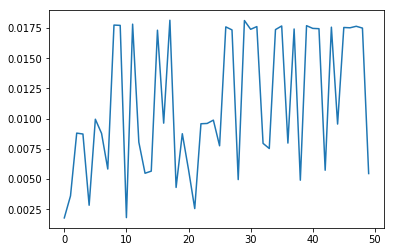

In [22]:
X = fftpack.fft(signal.detrend(e1))
N = int(len(X)/2)
freqs = fftpack.fftfreq(len(e1),d=timestep)
freqs = freqs[:N]
Y = 1/N*np.abs(X[:N])
modes = freqs[Y.argsort()]
print (modes[-50:])
plt.plot(modes[-50:])

# Comparison with my classical MD on the same motor molecule(weak Langevin thermostat):

the mean is: 302.43766235523054
the mean is: 302.4376623552306
the mean is: 302.43766235523054
the mean is: 2404.217015899649
the mean is: 302.43766235523054
the mean is: 302.4376623552306
the mean is: 302.43766235523054
the mean is: 604.8753247104612


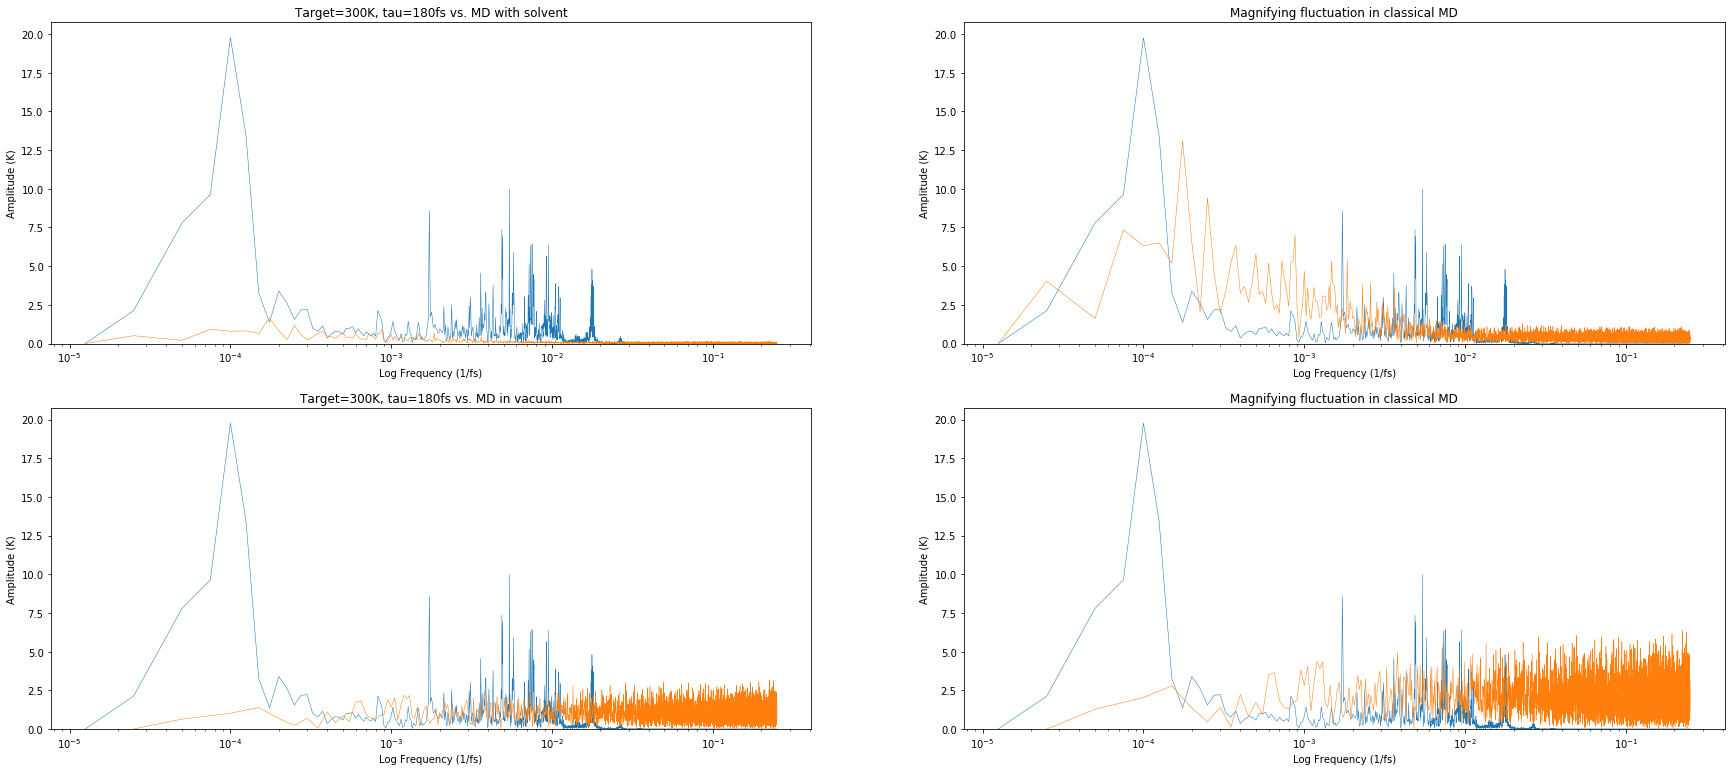

In [22]:
md = np.genfromtxt("/home/winter/onsager/md.dat")
md = md[-length:]

mdvac = np.genfromtxt("/home/winter/onsager/mdvac.dat")
mdvac = mdvac[-length:]

fig6, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(30,13))
fig5.suptitle('N-H chain vs. classical MD',fontsize=32)

ax1.set_title("Target=300K, tau=180fs vs. MD with solvent")
spectrum_detrendlog(ax1, n2)
spectrum_detrendlog(ax1, md * np.mean(n2)/np.mean(md))   # to account for that T_fluctuation~T

ax2.set_title("Magnifying fluctuation in classical MD")
spectrum_detrendlog(ax2, n2)
spectrum_detrendlog(ax2, md * 8 * np.mean(n2)/np.mean(mdvac))   # to account for that T_fluctuation~T

ax3.set_title("Target=300K, tau=180fs vs. MD in vacuum")
spectrum_detrendlog(ax3, n2)
spectrum_detrendlog(ax3, mdvac * np.mean(n2)/np.mean(mdvac))   # to account for that T_fluctuation~T

ax4.set_title("Magnifying fluctuation in classical MD")
spectrum_detrendlog(ax4, n2)
spectrum_detrendlog(ax4, mdvac * 2 * np.mean(n2)/np.mean(mdvac))   # to account for that T_fluctuation~T

# To show temporal change, plot spectrograms: